In [2]:
import sys
import logging
import numpy as np
import pandas as pd
import plotly
import optuna

In [3]:
def f(a, b, c):
    _a = -1000 * (a)**2
    _bc = 50 - (b*c-10)**2
    _d = 0
    return _a + _bc + _d + 10*b

In [4]:
study_name = "example-study"  # Unique identifier of the study.
storage_name = "sqlite:///{}.db".format(study_name)
study = optuna.create_study(study_name=study_name, 
                            storage=storage_name, 
                            direction='maximize',
                            sampler=optuna.samplers.CmaEsSampler(),
#                             sampler=optuna.samplers.TPESampler(multivariate=True, consider_endpoints=True, constant_liar=True),
#                             sampler=optuna.samplers.RandomSampler(),
                            load_if_exists=True)

[I 2021-07-25 21:28:25,028] A new study created in RDB with name: example-study


In [5]:
def get_trialhash(trial):
    return hash(tuple(sorted(trial.params.items())))

def get_unique_trials(study, n, max_iter=10000):
    trialhashes = set([get_trialhash(t) for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE])
    trials = []
    for i in range(n):
        trial = study.ask()
        for j in range(max_iter):
            a = trial.suggest_discrete_uniform('a', -1.0, 1.0, 0.1)
            b = trial.suggest_discrete_uniform('b', 9, 10, 0.1)
            c = trial.suggest_discrete_uniform('c', 0, 2, 0.1)
            th = get_trialhash(trial)
            if(th not in trialhashes):
                break
        trialhashes.add(th)
        trials.append(trial)
    return trials

def get_trials(study, n, max_iter=10000):
    trialhashes = set([get_trialhash(t) for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE])
    trials = []
    for i in range(n):
        trial = study.ask()
        a = trial.suggest_discrete_uniform('a', -1.0, 1.0, 0.1)
        b = trial.suggest_discrete_uniform('b', 9, 10, 0.1)
        c = trial.suggest_discrete_uniform('c', 0, 2, 0.1)
        trials.append(trial)
    return trials

10

{'a': 0.0, 'b': 10.0, 'c': 1.0} 150.0


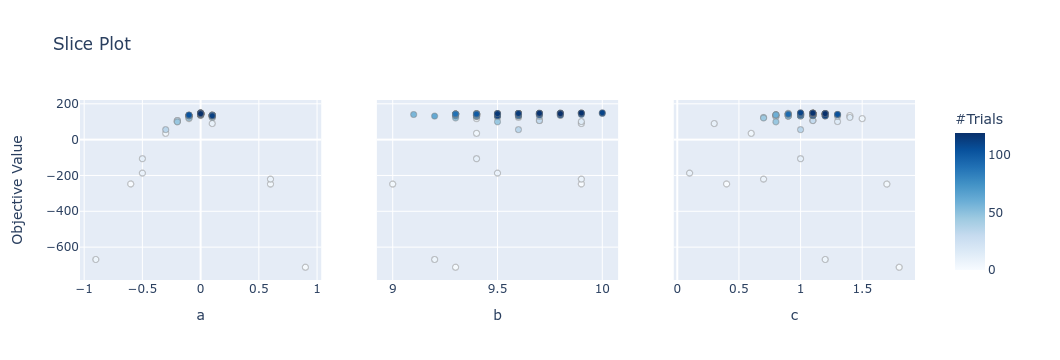

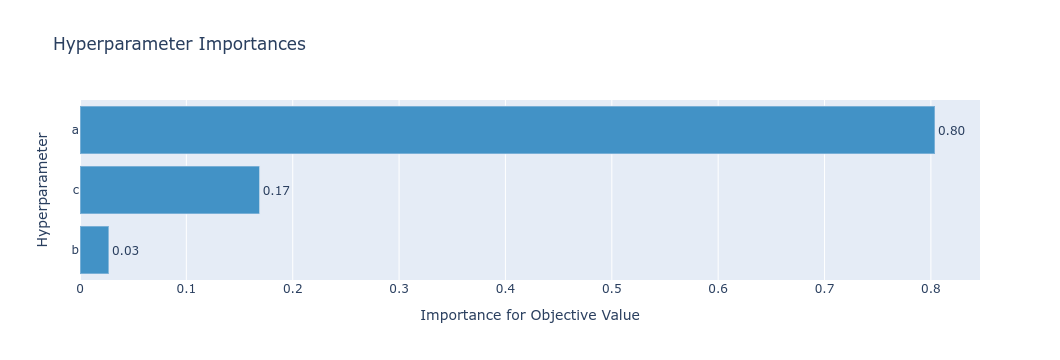

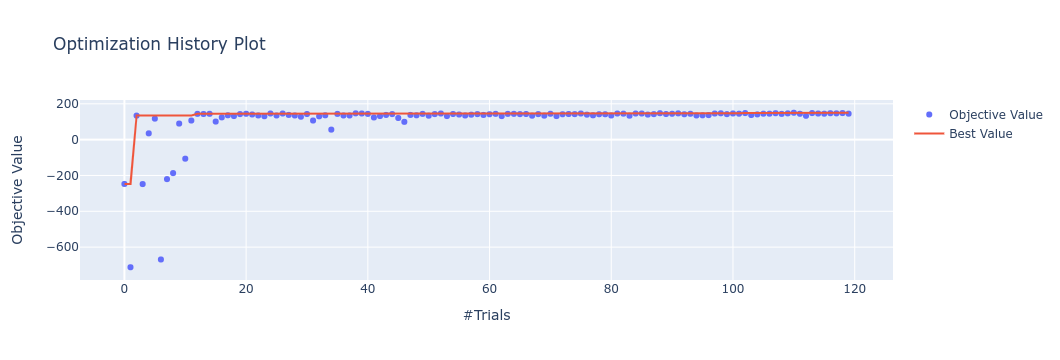

,number,value,datetime_start,datetime_complete,duration,params_a,params_b,params_c,system_attrs_cma:generation,system_attrs_cma:n_restarts,system_attrs_cma:optimizer:0,system_attrs_cma:optimizer:1,state
110,110,150.0000,2021-07-25 21:29:17.469686,2021-07-25 21:29:19.153768,0 days 00:00:01.684082,0.0,10.0,1.0,10.0,0.0,800495b6050000000000008c0a636d6165732e5f636d61...,00000001040302aa913d00462c0d8a3703d0a975a407b1...,COMPLETE
111,111,144.3104,2021-07-25 21:29:17.503691,2021-07-25 21:29:19.157653,0 days 00:00:01.653962,0.0,9.7,1.2,10.0,0.0,800495b6050000000000008c0a636d6165732e5f636d61...,00000001040302aa913d00462c0d8a3703d0a975a407b1...,COMPLETE
112,112,133.0400,2021-07-25 21:29:17.707924,2021-07-25 21:29:19.161049,0 days 00:00:01.453125,0.1,9.5,1.2,10.0,0.0,800495b6050000000000008c0a636d6165732e5f636d61...,00000001040302aa913d00462c0d8a3703d0a975a407b1...,COMPLETE
113,113,148.2079,2021-07-25 21:29:17.735853,2021-07-25 21:29:19.164229,0 days 00:00:01.428376,0.0,9.9,1.1,10.0,0.0,800495b6050000000000008c0a636d6165732e5f636d61...,00000001040302aa913d00462c0d8a3703d0a975a407b1...,COMPLETE
114,114,145.6864,2021-07-25 21:29:17.934863,2021-07-25 21:29:19.167432,0 days 00:00:01.232569,0.0,9.6,1.1,10.0,0.0,800495b6050000000000008c0a636d6165732e5f636d61...,00000001040302aa913d00462c0d8a3703d0a975a407b1...,COMPLETE
115,115,144.7975,2021-07-25 21:29:18.136901,2021-07-25 21:29:19.171540,0 days 00:00:01.034639,0.0,9.5,1.1,10.0,0.0,800495b6050000000000008c0a636d6165732e5f636d61...,00000001040302aa913d00462c0d8a3703d0a975a407b1...,COMPLETE
116,116,147.3916,2021-07-25 21:29:18.334864,2021-07-25 21:29:19.174956,0 days 00:00:00.840092,0.0,9.8,1.1,10.0,0.0,800495b6050000000000008c0a636d6165732e5f636d61...,00000001040302aa913d00462c0d8a3703d0a975a407b1...,COMPLETE
117,117,146.5511,2021-07-25 21:29:18.549577,2021-07-25 21:29:19.178296,0 days 00:00:00.628719,0.0,9.7,1.1,10.0,0.0,800495b6050000000000008c0a636d6165732e5f636d61...,00000001040302aa913d00462c0d8a3703d0a975a407b1...,COMPLETE
118,118,148.2079,2021-07-25 21:29:18.753069,2021-07-25 21:29:19.181452,0 days 00:00:00.428383,0.0,9.9,1.1,10.0,0.0,800495b6050000000000008c0a636d6165732e5f636d61...,00000001040302aa913d00462c0d8a3703d0a975a407b1...,COMPLETE
119,119,144.9024,2021-07-25 21:29:18.954561,2021-07-25 21:29:19.184487,0 days 00:00:00.229926,0.0,9.8,1.2,10.0,0.0,800495b6050000000000008c0a636d6165732e5f636d61...,00000001040302aa913d00462c0d8a3703d0a975a407b1...,COMPLETE


In [17]:
n_trials = 10
trials = get_unique_trials(study, n_trials)
display(len(trials))
# display([t.params for t in trials])

for t in trials:
    score = f(**t.params)
    study.tell(t, score)

print(study.best_params, study.best_value)
plots = [
    optuna.visualization.plot_slice(study),
    optuna.visualization.plot_param_importances(study),
    optuna.visualization.plot_optimization_history(study),
]
[p.show() for p in plots];
display(study.trials_dataframe().tail(n_trials))